In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [222]:
#read csv data
data=pd.read_csv("loan.csv",sep=',',header=0,index_col=0)
pd.set_option('display.max_column',None)
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [223]:
# how many null values each columns have
data.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 110, dtype: int64

In [224]:
# delete column which have null values more then 50% 
data.dropna(axis=1,thresh=int(len(data)*0.5),inplace=True)

In [225]:
#column after deleting some column which has null values more then 50% 
data.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                    

In [226]:
# filling the empty values in column emp_title
data['emp_title'].fillna('Other',inplace=True)

In [227]:
# drop some unnecessary column which is not required
data.drop(['member_id','tax_liens','delinq_amnt','desc','pymnt_plan','url','initial_list_status','out_prncp','out_prncp_inv','collections_12_mths_ex_med','policy_code','pub_rec_bankruptcies'],axis=1,inplace=True)

In [228]:
# how many null values columns have 
data.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
total_pymnt                    0
total_pymnt_inv                0
total_rec_

In [229]:
#shape after delete some unnecessary data 
data.shape

(39717, 41)

In [230]:
# calculating some statistical data with describe method
data['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

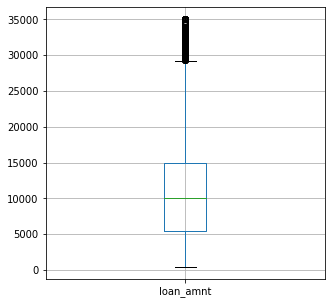

In [231]:
# figuring out the outliers
data.boxplot(column=['loan_amnt'],figsize=(5,5))

In [234]:
# deleting outliers
num = data["loan_amnt"].quantile(0.96)
data = data[data["loan_amnt"] < num]
data["loan_amnt"].describe()

count    36714.000000
mean      9798.190064
std       5663.012735
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      24975.000000
Name: loan_amnt, dtype: float64

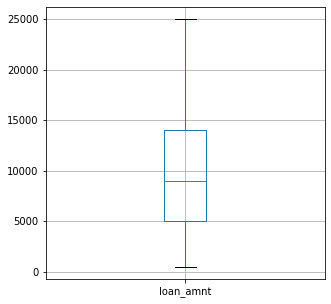

In [235]:
# plotting the box plot after removing all outliers
data.boxplot(column=['loan_amnt'],figsize=(5,5))

In [236]:
data['installment'].describe()

count    36714.000000
mean       289.183720
std        166.425029
min         15.690000
25%        161.130000
50%        261.880000
75%        387.150000
max        902.540000
Name: installment, dtype: float64

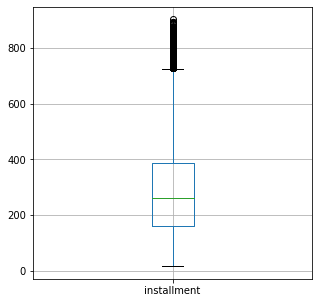

In [237]:
data.boxplot(column=['installment'],figsize=(5,5))

In [238]:
num = data["installment"].quantile(0.97)
data = data[data["installment"] < num]
data["installment"].describe()

count    35610.000000
mean       275.287528
std        148.438523
min         15.690000
25%        158.302500
50%        255.570000
75%        373.220000
max        670.810000
Name: installment, dtype: float64

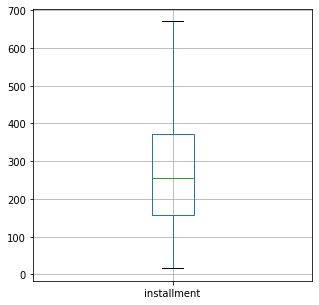

In [239]:
data.boxplot(column=['installment'],figsize=(5,5))

In [240]:
data['annual_inc'].describe()

count    3.561000e+04
mean     6.404858e+04
std      5.767724e+04
min      4.000000e+03
25%      3.999600e+04
50%      5.500000e+04
75%      7.647956e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

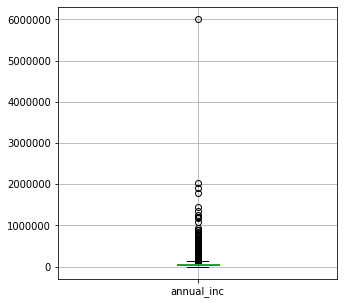

In [241]:
data.boxplot(column=['annual_inc'],figsize=(5,5))

In [246]:
num = data["annual_inc"].quantile(0.96)
data = data[data["annual_inc"] < num]
data["annual_inc"].describe()

count     32388.000000
mean      54565.134057
std       22036.824661
min        4000.000000
25%       38000.000000
50%       51996.000000
75%       70000.000000
max      109995.000000
Name: annual_inc, dtype: float64

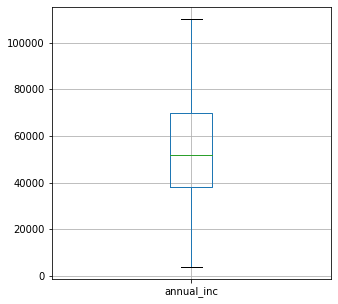

In [247]:
data.boxplot(column=['annual_inc'],figsize=(5,5))

In [248]:
# calculating statistical data after removal of outliers
data.describe(include='all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,acc_now_delinq,chargeoff_within_12_mths
count,32388.000000,32388.000000,32388.000000,32388,32388,32388.000000,32388,32388,32388,31397,32388,32388.000000,32388,32388,32388,32388,32377,32388,32388,32388.000000,32388.000000,32388,32388.000000,32388.000000,32388.000000,32388.000000,32341,32388.000000,32388.000000,32388.000000,32388.000000,32388.000000,32388.000000,32388.000000,32388.000000,32325,32388.000000,32387,32388,32388.0,32350.0
unique,NaN,NaN,NaN,2,361,NaN,7,35,24223,11,5,NaN,3,55,3,14,16455,815,50,NaN,NaN,516,NaN,NaN,NaN,NaN,1074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,105,1,NaN,NaN
top,NaN,NaN,NaN,36 months,10.99%,NaN,B,A4,Other,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,debt_consolidation,Debt Consolidation,112xx,CA,NaN,NaN,Oct-99,NaN,NaN,NaN,NaN,0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,May-16,INDIVIDUAL,NaN,NaN
freq,NaN,NaN,NaN,24448,773,NaN,9964,2519,1985,6502,16724,NaN,15406,1798,26955,15082,1706,434,5649,NaN,NaN,316,NaN,NaN,NaN,NaN,799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,912,NaN,8175,32388,NaN,NaN
mean,9190.965018,9025.766488,8592.727406,NaN,NaN,268.526812,NaN,NaN,NaN,NaN,NaN,54565.134057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.541306,0.143973,NaN,0.858744,8.958225,0.059343,10722.133938,NaN,20.739224,9929.735834,9466.091588,8102.755118,1757.437942,1.224148,68.318697,8.863633,NaN,2114.328431,NaN,NaN,0.0,0.0
std,5252.346135,5095.268474,5107.734510,NaN,NaN,146.205729,NaN,NaN,NaN,NaN,NaN,22036.824661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.699880,0.489102,NaN,1.054901,4.282504,0.245498,11544.287283,NaN,10.888785,6443.652214,6425.706464,5138.808974,1823.782514,6.326052,481.115494,113.402506,NaN,3327.944022,NaN,NaN,0.0,0.0
min,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,NaN,NaN,NaN,4000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,2.000000,0.000000,0.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.0,0.0
25%,5000.000000,5000.000000,4800.000000,NaN,NaN,155.300000,NaN,NaN,NaN,NaN,NaN,38000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.410000,0.000000,NaN,0.000000,6.000000,0.000000,3286.500000,NaN,13.000000,5039.993995,4585.862500,4000.000000,588.495000,0.000000,0.000000,0.000000,NaN,197.490000,NaN,NaN,0.0,0.0
50%,8000.000000,8000.000000,7875.000000,NaN,NaN,247.530000,NaN,NaN,NaN,NaN,NaN,51996.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.680000,0.000000,NaN,1.000000,8.000000,0.000000,7708.500000,NaN,19.000000,8593.927521,8082.115000,7125.000000,1161.390000,0.000000,0.000000,0.000000,NaN,444.870000,NaN,NaN,0.0,0.0
75%,12200.000000,12000.000000,12000.000000,NaN,NaN,364.380000,NaN,NaN,NaN,NaN,NaN,70000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.880000,0.000000,NaN,1.000000,11.000000,0.000000,14306.000000,NaN,27.000000,13781.608785,13263.960000,12000.000000,2247.070000,0.000000,0.000000,0.000000,NaN,2749.802500,NaN,NaN,0.0,0.0


In [249]:
data['loan_status'].value_counts()

Fully Paid     26955
Charged Off     4619
Current          814
Name: loan_status, dtype: int64

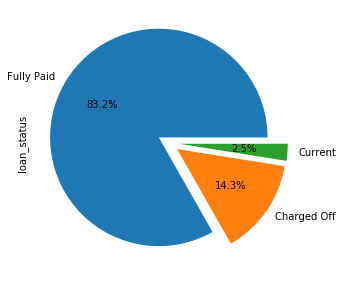

In [250]:
data['loan_status'].value_counts().plot.pie(explode=(0.1,0.1,0.1),figsize=(5,5),autopct='%1.1f%%')

In [251]:
# We only need only Fully Paid and Charged off loan status

data= data.loc[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [252]:
#Shape after only take loan status- fully paid and Charged off
data.shape

(31574, 41)

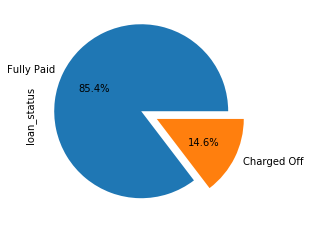

In [253]:
# loan status by pie chart 

data['loan_status'].value_counts().plot.pie(explode=(0.1,0.1),autopct='%1.1f%%')

Text(0, 0.5, 'Numner of Loans Funded')

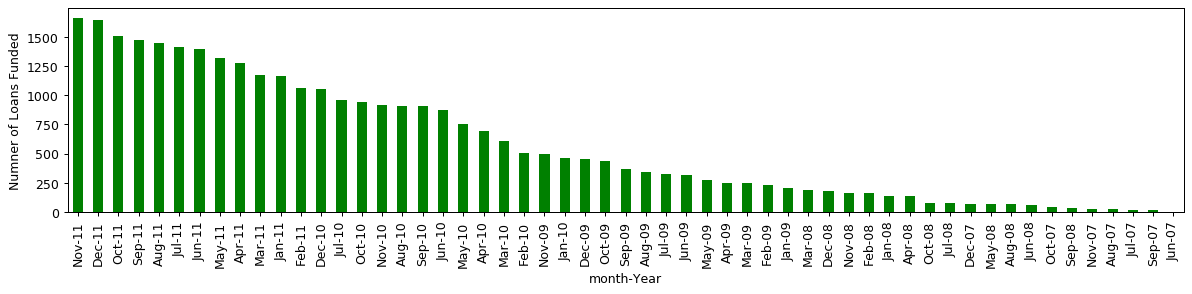

In [254]:
# analysis that in which month-year how many number of loans funded

plt.figure(figsize=(16,3),dpi=90)
data['issue_d'].value_counts().plot.bar(color='green')
plt.xlabel('month-Year')
plt.ylabel('Numner of Loans Funded')

In [255]:
# description on loan amount 
data['loan_amnt'].describe()

# min loan amount is- 500 and max is 35000 and mean of loan amount is 11047

count    31574.000000
mean      9085.024862
std       5193.566910
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      24975.000000
Name: loan_amnt, dtype: float64

In [256]:
# analysis on loan status and loan amount
data.groupby('loan_status')['loan_amnt'].describe()
# we can clearly see Charged off loan status has more mean value than fully paid loan status

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4619.0,9702.403118,5630.052604,900.0,5000.0,9000.0,14000.0,24925.0
Fully Paid,26955.0,8979.231126,5107.661829,500.0,5000.0,8000.0,12000.0,24975.0


In [257]:
# analysis on term duration that what percent loan funded for which term duration
data['term'].value_counts(normalize=True)

 36 months    0.774308
 60 months    0.225692
Name: term, dtype: float64

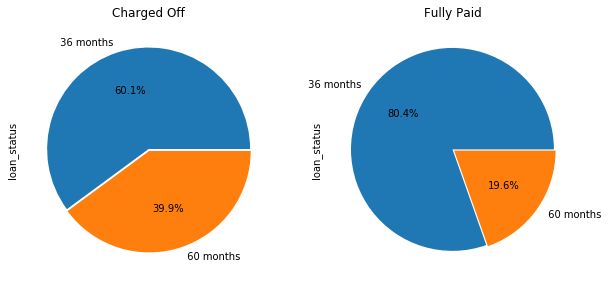

In [258]:
# number of loan funded with term duration,only Charged off loan status
plt.figure(figsize=(10,5))
plt.subplot(121)
d=data.groupby('term')['loan_status'].value_counts().loc[:,'Charged Off']
d.plot.pie(explode=(0.01,0.01),autopct='%1.1f%%')
plt.title('Charged Off');

plt.subplot(122)
d=data.groupby('term')['loan_status'].value_counts().loc[:,'Fully Paid']
d.plot.pie(explode=(0.01,0.01),autopct='%1.1f%%')
plt.title('Fully Paid');


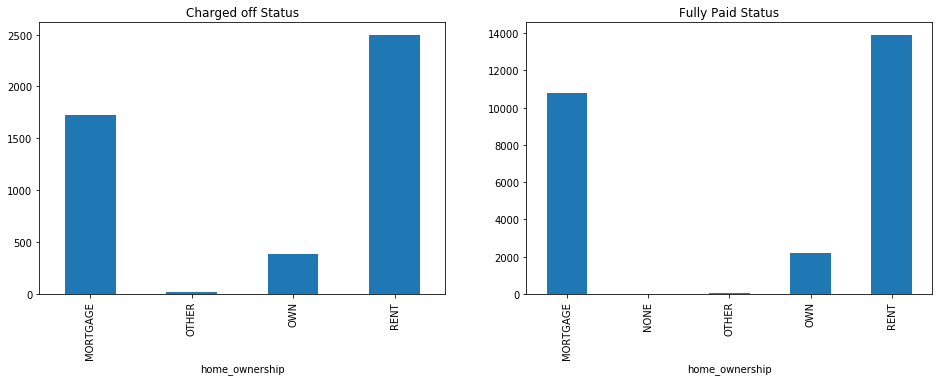

In [259]:
# loan status vs home ownership graph 
plt.subplot(1,2,1)
x=data.groupby('home_ownership')['loan_status'].value_counts().loc[:,'Charged Off']
x.plot.bar(figsize=(16,5),title='Charged off Status');

plt.subplot(1,2,2)
y=data.groupby('home_ownership')['loan_status'].value_counts().loc[:,'Fully Paid']
y.plot.bar(figsize=(16,5),title='Fully Paid Status');

# most of rent home ownership applicant has fully paid of status but in charged off category rent ownership is highest As well

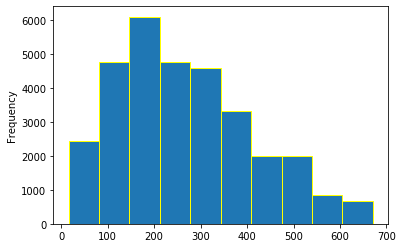

In [260]:
# histogram graph for installment 
data['installment'].plot.hist(edgecolor='yellow')

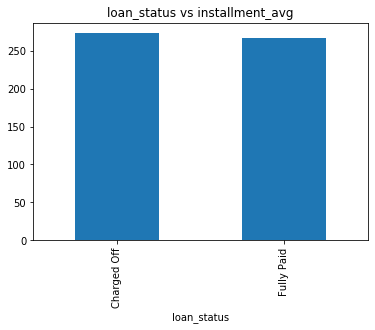

In [261]:
# loan status vs installment 
data.groupby('loan_status')['installment'].mean().plot.bar(title='loan_status vs installment_avg')
# we can clearly see that charged off status has more mean installment value then fully paid.

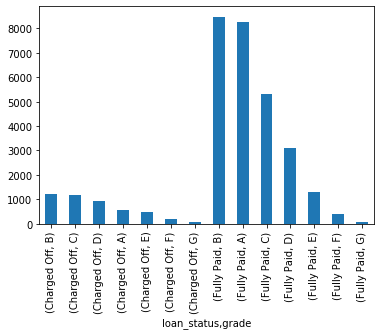

In [262]:
# loan status vs grade 
data.groupby('loan_status')['grade'].value_counts().plot.bar()
# b grade has higest charged off status as well as fully paid status

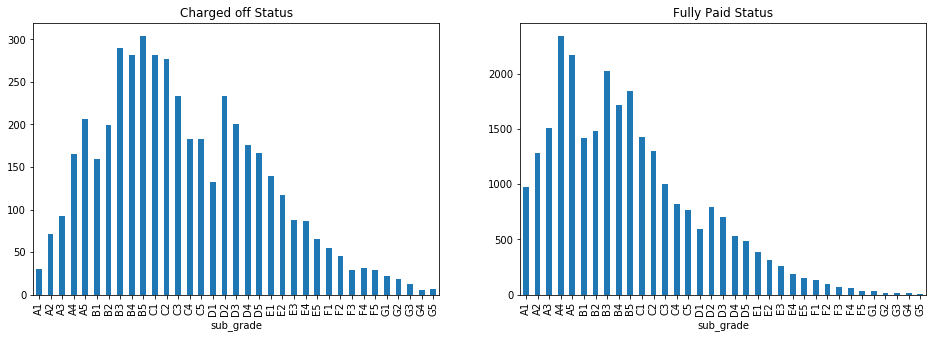

In [263]:
# loan status vs sub grade
plt.subplot(1,2,1)
l=data.groupby('sub_grade')['loan_status'].value_counts().loc[:,'Charged Off']
l.plot.bar(figsize=(16,5),title='Charged off Status');

plt.subplot(1,2,2)
m=data.groupby('sub_grade')['loan_status'].value_counts().loc[:,'Fully Paid']
m.plot.bar(figsize=(16,5),title='Fully Paid Status');
# in graph we can clearly see that in charged off B5 sub grade has highest and in fully paid A4 sub grade has highest

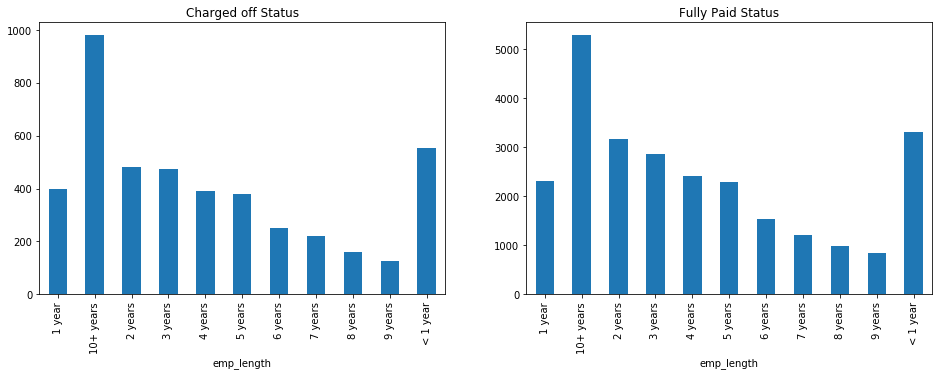

In [264]:
# aplicant employement experience for Charged off status
plt.subplot(1,2,1)
x=data.groupby('emp_length')['loan_status'].value_counts().loc[:,'Charged Off']
x.plot.bar(figsize=(16,5),title='Charged off Status');

plt.subplot(1,2,2)
y=data.groupby('emp_length')['loan_status'].value_counts().loc[:,'Fully Paid']
y.plot.bar(figsize=(16,5),title='Fully Paid Status');

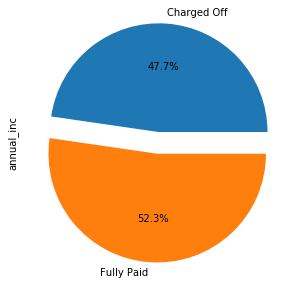

In [265]:
data.groupby('loan_status')['annual_inc'].mean().plot.pie(figsize=(5,5),explode=(0.1,0.1),autopct='%1.1f%%')

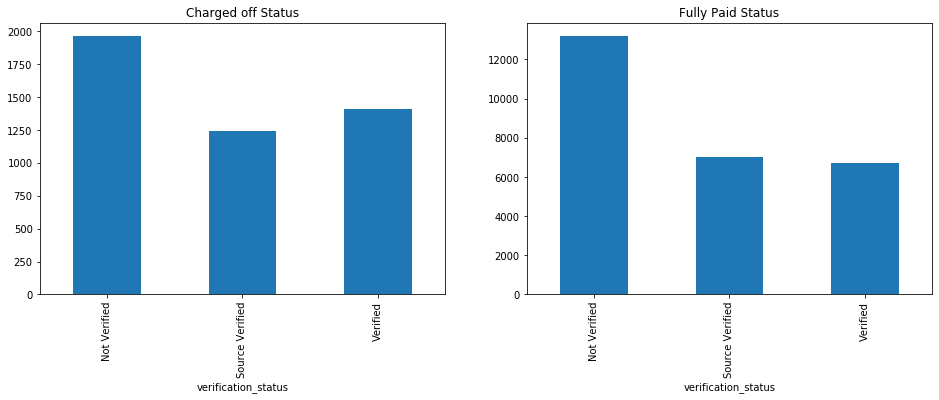

In [266]:
#varification vs loan status
plt.subplot(1,2,1)
x=data.groupby('verification_status')['loan_status'].value_counts().loc[:,'Charged Off']
x.plot.bar(figsize=(16,5),title='Charged off Status');

plt.subplot(1,2,2)
y=data.groupby('verification_status')['loan_status'].value_counts().loc[:,'Fully Paid']
y.plot.bar(figsize=(16,5),title='Fully Paid Status');

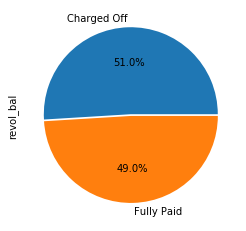

In [267]:
#Total credit revolving balance
data.groupby('loan_status')['revol_bal'].mean().plot.pie(explode=(0.01,0.01),autopct='%1.1f%%')

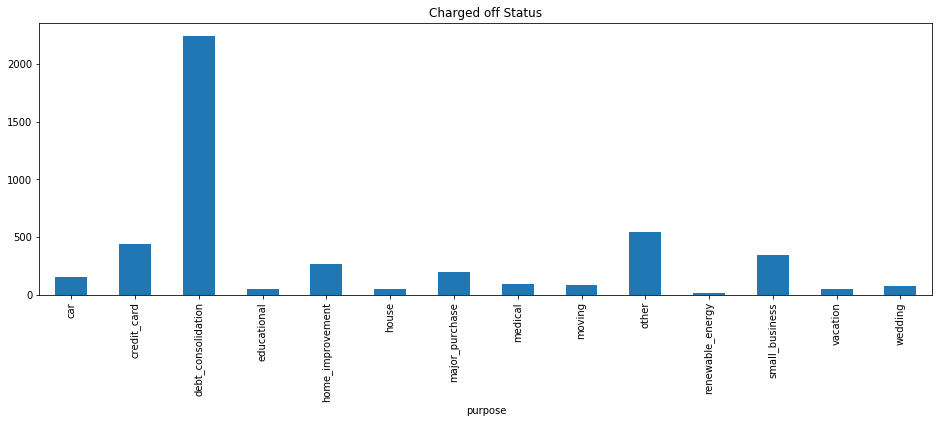

In [268]:
# purpose vs loan status
z=data.groupby('purpose')['loan_status'].value_counts().loc[:,'Charged Off']
z.plot.bar(figsize=(16,5),title='Charged off Status');


In [269]:
# title variable
data['title'].value_counts().sort_values(ascending=False).head(10)

Debt Consolidation           1642
Debt Consolidation Loan      1255
Personal Loan                 533
debt consolidation            387
Consolidation                 366
Credit Card Consolidation     292
Personal                      255
Credit Card Loan              253
Debt consolidation            248
Home Improvement              230
Name: title, dtype: int64

In [270]:
# analysis on zip code
data['zip_code'].nunique()

814

In [271]:
# top 10 zip code where most of applicant belong
data['zip_code'].value_counts().sort_values(ascending=False).head(10)

112xx    423
945xx    411
100xx    411
606xx    404
900xx    359
070xx    347
021xx    317
300xx    295
917xx    294
331xx    284
Name: zip_code, dtype: int64

In [272]:
# applicant address state
data['addr_state'].nunique()

50

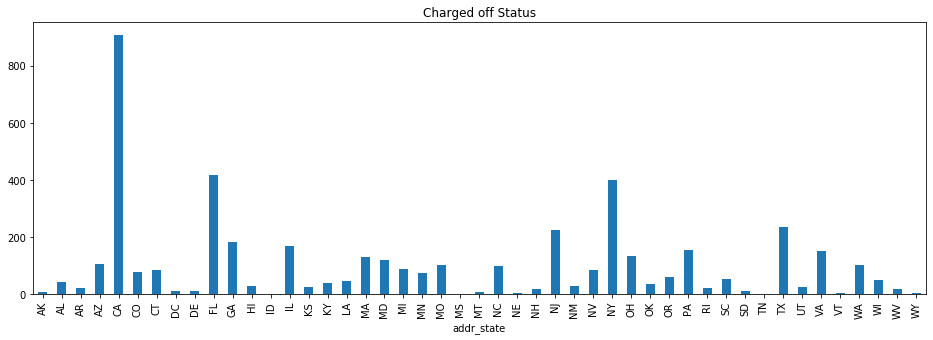

In [273]:
# loan status vs address state analysis for only charged off status
z=data.groupby('addr_state')['loan_status'].value_counts().loc[:,'Charged Off']
z.plot.bar(figsize=(16,5),title='Charged off Status');

In [274]:
# dti variable
data['dti'].describe()

count    31574.000000
mean        13.497765
std          6.694167
min          0.000000
25%          8.360000
50%         13.640000
75%         18.830000
max         29.990000
Name: dti, dtype: float64

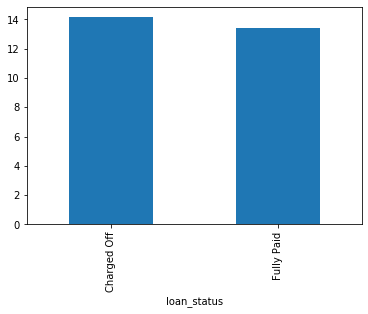

In [275]:

# A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage 
# and the requested LC loan, divided by the borrower’s self-reported monthly income.

data.groupby('loan_status')['dti'].mean().plot.bar()

#Completed loans that are charged off tend to have higher debt-to-income ratios.

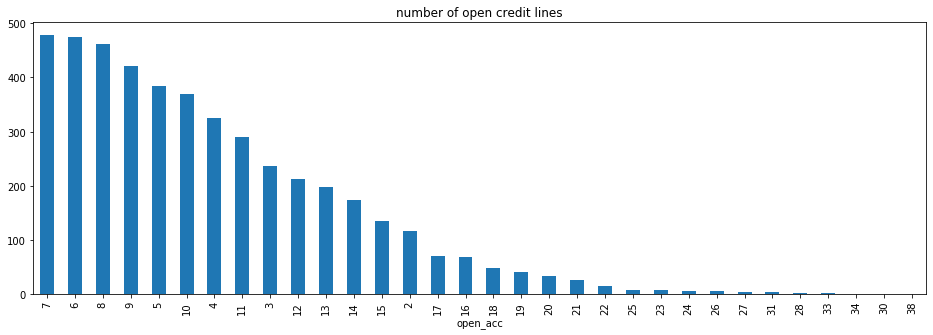

In [276]:
# open acc vs loan status for only charged off
x1=data.groupby('open_acc')['loan_status'].value_counts().loc[:,'Charged Off']
x1.sort_values(ascending=False).plot.bar(figsize=(16,5),title='number of open credit lines')

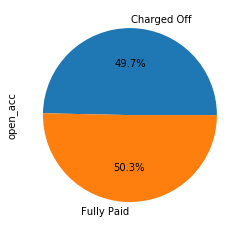

In [277]:
#The number of open credit lines in the borrower's credit file.
data.groupby('loan_status')['open_acc'].mean().plot.pie(autopct='%1.1f%%')


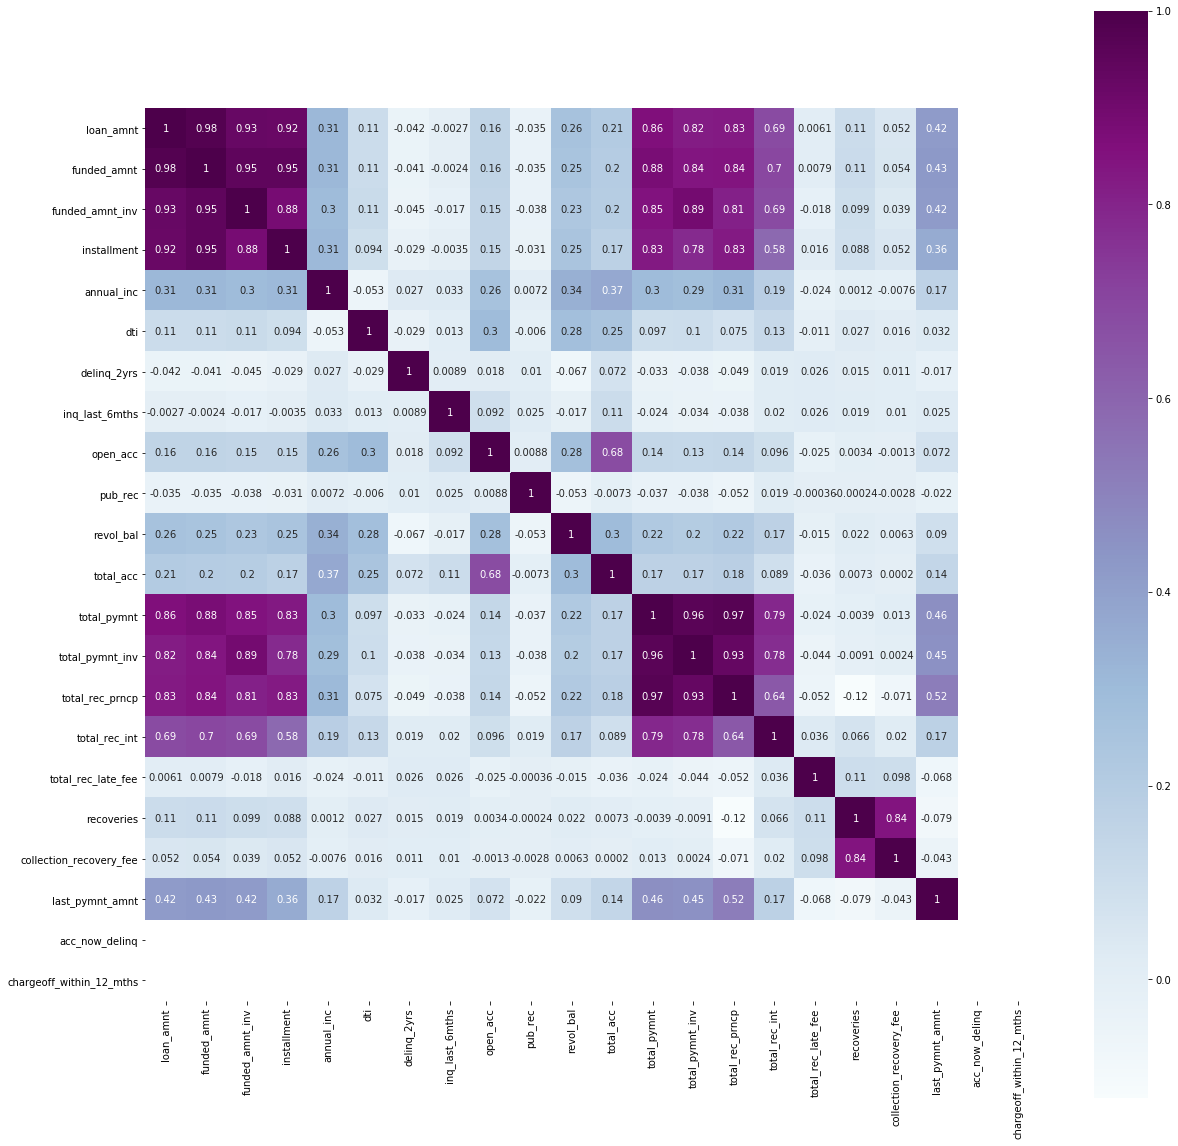

In [278]:
#corelation matrix 

matrix = data.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

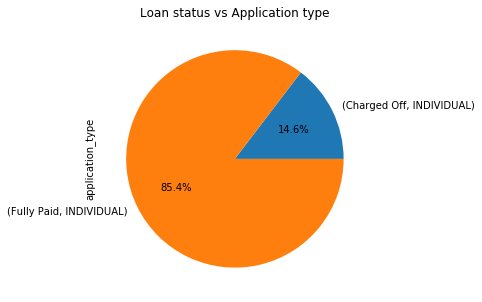

In [279]:
#loan vs application type
data.groupby('loan_status')['application_type'].value_counts().plot.pie(figsize=(5,5),autopct='%1.1f%%',title='Loan status vs Application type')